In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression # explicit class import from module
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsClassifier #we know where this object comes from
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


warnings.filterwarnings('ignore') # Code for stopping warnings (deprecation warning, etc.)
pd.set_option('display.max_columns', None) # Code for showing all columns in the dateset, withoud '...' in between.

In [5]:
people = pd.read_csv("../raw_data/people_analytics.csv")

In [6]:
people.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
people['Attrition'] = people['Attrition'].map({
                                    'Yes': 1,
                                    'No': 0
                                })

In [9]:
people.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [10]:
people['Attrition'].unique()

array([1, 0])

In [11]:
attrition = people[(people['Attrition'] != 0)]
no_attrition = people[(people['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = people['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [12]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = people['Attrition'].corr(people[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [13]:
def plot_distribution_p(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = people['Attrition'].corr(people[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    tmp3 = pd.DataFrame(pd.crosstab(people[var_select],people['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    
    color=['lightskyblue','gold' ]
    trace1 = go.Histogram(
        x=tmp1,
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Histogram(
        x=tmp2,
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    
    fig.update_layout(barmode='stack')
    
    py.iplot(fig)

In [14]:
def barplot(var_select, x_no_numeric) :
    tmp1 = people[(people['Attrition'] != 0)]
    tmp2 = people[(people['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(people[var_select],people['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [15]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [16]:
people.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.010145  -0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StandardHours                  NaN        NaN        NaN               NaN   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EmployeeCount  EmployeeNumber  \
Age                        0.208034            NaN       -0.010145   
Attrition                 -0.031373            NaN       -0.010577   
DailyRate                 -0.016806            NaN       -0.050990   
DistanceFromHome           0.021042            NaN        0.032916   
Education                  1.000000            NaN        0.042070   
EmployeeCount                   NaN            NaN             NaN   
EmployeeNumber             0.042070            NaN        1.000000   
EnvironmentSatisfaction   -0.027128            NaN        0.017621   
HourlyRate                 0.016775            NaN        0.035179   
JobInvolvement             0.042438            NaN       -0.006888   
JobLevel                   0.101589            NaN       -0.018519   
JobSatisfaction           -0.011296            NaN       -0.046247   
MonthlyIncome              0.094961            NaN       -0.014829   
MonthlyRate               -0.026084            NaN        0.012648   
NumCompaniesWorked         0.126317            NaN       -0.001251   
PercentSalaryHike         -0.011111            NaN       -0.012944   
PerformanceRating         -0.024539            NaN       -0.020359   
RelationshipSatisfaction  -0.009118            NaN       -0.069861   
StandardHours                   NaN            NaN             NaN   
StockOptionLevel           0.018422            NaN        0.062227   
TotalWorkingYears          0.148280            NaN       -0.014365   
TrainingTimesLastYear     -0.025100            NaN        0.023603   
WorkLifeBalance            0.009819            NaN        0.010309   
YearsAtCompany             0.069114            NaN       -0.011240   
YearsInCurrentRole         0.060236            NaN       -0.008416   
YearsSinceLastPromotion   

As features com mais influência no nosso target são:

- MonthlyIncome
- PercentSalaryHike
- PerformanceRating
- JobInvolvement, JobLevel, JobSatisfaction
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole

### Explorar análises entre essas features e as demais, principalmente com features de tempo

---

## Age x Attrition 

In [17]:
plot_distribution('Age', False)
plot_distribution_p('Age', False)
barplot('Age', False)

A faixa etaria com mais pessoas com attrition esta entre os 25 e 35 anos.
A faixa etaria com mais pessoas sem attrition esta entre 30 e 40 anos.
The attrition rate is highest below 20 years old and around 58.

---

## Business Travel x Attrition

In [14]:
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)

O Travel_Rarely não impact muito no targe, para ambas respostas a influência é parecida. O que mais chama atenção nessa comparação são para o Travel_Frequently e Non_Travel, principalmente para o primeiro, uma vez que bate 29% de compatibilidade com o Attrition. 

All other things being equal, employees who travel frequently are twice as likely to suffer from attrition than those who only travel rarely, and 3 times more likely than non-travelers.

---

## Daily Rate x Attrition YYY

<AxesSubplot:xlabel='DailyRate', ylabel='Attrition'>

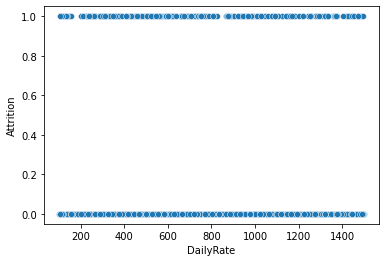

In [23]:
plot_distribution('DailyRate', 100)
sns.scatterplot(people['DailyRate'], people['Attrition'])

---

## Department x Attrition

In [16]:
plot_pie('Department') 
barplot('Department',True)

Sales and HR departments seem to have a larger attrition rate. Interesting to compare the rate between core business and supporting roles.

---

## Distance From Home X Attrition 

In [52]:
plot_pie('DistanceFromHome') 
plot_distribution_p('DistanceFromHome', False)
barplot('DistanceFromHome', False)

While the %Attrition curve is too unstable to represent a clear correlation, it would appear as though the chances of attrition are higher and more unpredictable as the distance from home is higher.

---

## Education x Attrition ---

In [18]:
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)

People with the education level below college seem slightly more likely to suffer from attrition, but once again the correlation and disparities amongst categories are too limited to conclude on any strong influence.

technical degrees, marketing and HR graduates seem to be the ones most likely to suffer from attrition.
We should regroup the data in 2 categories: core business and supporting roles, and compare their respective attrition levels.

---

## Environment Satisfaction x Attrition

In [19]:
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)

Aparentemente o Environment Satisfaction não é uma boa métrica para decidir o attrition, uma vez que, apenas o o nível 1 tem um impacto médio no nosso target e ainda assim, como observado no primeiro gráfico não há muitas conclusões a serem tiradas.

---

## Gender x Attrition

In [20]:
plot_pie("Gender")
barplot('Gender',True)

Gender does not appear to be of much influence in the attrition level, as men's attrition rate is only slightly larger than the woman's.

---

## Hourly Rate x Attrition YYY

In [24]:
plot_distribution('HourlyRate', False)
plot_distribution_p('HourlyRate', False)

---

## Job Involvement x Attrition

In [22]:
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)

As expected, the attrition level increases as the job involvement decreases. There is a negative correlation.

---

## Job Level x Attrition

In [23]:
plot_pie('JobLevel')
barplot('JobLevel',False)

The attrition rate curve seems to overall decrease as the job level increases. Once again, this is an expected negative correlation. 

Aqueles que tem um nível baixo de Job Level tem uma probabilidade enorme de attrition, subindo um pouco o nível o no_atrittion sobe também.


##

Analisar JobLevel x TotalWorkingYears

---

## Job Role x Attrition

In [24]:
plot_pie('JobRole')
barplot('JobRole',True)

Technical jobs, HR and sales person seem to be the most propice to attrition. Once again, it would be interesting to divide the data between core and supporting jobs and compare their attrition rates.


---

# Job Satisfaction x Attrition

In [25]:
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)

Although it is very subtle, the attrition rate and job satisfaction rate seem negatively correlated. the weakness of this correlation is surprising as one might assume dissatisfaction would have a bigger impact on attrition.`


---

## Marital Status x Attrition

In [26]:
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)

While single people seem to have a stronger attrition rate, married and divorced couples are relatively similar.

## Monthly Income x Attrition --- 

In [57]:
plot_distribution('MonthlyIncome', 500)


The lower the income, the higher the attrition rate.

## Age x Marital Status x Attrition YYY

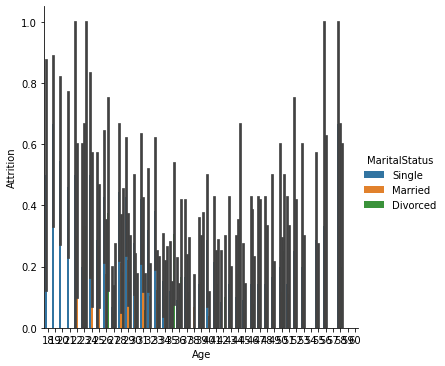

In [30]:
sns.catplot(x='Age', y='Attrition', data=people, kind='bar', hue='MaritalStatus')

## Monthly Rate x Attrition YYY

In [31]:
plot_distribution('MonthlyRate', 100)



## Number Of Companies Worked In x Attrition

In [29]:
plot_distribution('NumCompaniesWorked', False)

barplot('NumCompaniesWorked',False)

People that have worked in more companies seem slightly more likely to suffer from attrition, but once again the correlation and disparities amongst categories are too limited to conclude on any strong influence.


## Over Time x Attrition

In [30]:
plot_pie('OverTime')
barplot('OverTime',True)

There is much more attrition amongst "Yes overtime" than no. (find what that means)

## Percent Salary Hike x Attrition YYY

In [33]:
plot_distribution('PercentSalaryHike', False)
plot_distribution_p('PercentSalaryHike', False)

barplot('PercentSalaryHike',False)

## Total Working Years x Attrition

In [32]:
plot_distribution('TotalWorkingYears', False)

barplot('TotalWorkingYears', False)

negative correlation appears between them.

## Training Time Last Year x Attrition

In [34]:
plot_distribution('TrainingTimesLastYear', False)
plot_distribution_p('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)

Attrition rate seems to overall decrease as training time last year increase, but once again the correlation and disparities amongst categories are too limited to conclude on any strong influence.


## Years At Company x Attrition

In [34]:
plot_distribution('YearsAtCompany', False)

barplot('YearsAtCompany', False)

The attrition rate seems to decrease as the years at company increase, with 2 high spikes around 23 and 31 years.

## Years In Current Role x Attrition


In [35]:
plot_distribution('YearsInCurrentRole', False)
plot_distribution_p('YearsInCurrentRole', False)

barplot('YearsInCurrentRole', False)

Attrition rate seems to overall decrease as the years in current role increase increase, but once again the correlation and disparities amongst categories are too limited, and there are too many spikes (particularly around 7, 12 and 15 years) to conclude on any real correlation.


## Years Since Last Promotion x Attrition


In [36]:
plot_distribution('YearsSinceLastPromotion', False)
plot_distribution_p('YearsSinceLastPromotion', False)

barplot('YearsSinceLastPromotion', False)

There doesnt seem to be any real correlation between attrition rate and years since last promotion.

## Years With Current Manager x Attrition

In [37]:
plot_distribution('YearsWithCurrManager', False)

barplot('YearsWithCurrManager', False)

The attrition rate seems to decrease as the years with current manager increase, with a high spikes around 14 years.

## Performance Rating x Attrition

In [38]:
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)

Performance rating does not seem to impact the attrition rate.

## Relationship Satisfaction x Attrition

In [39]:
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)

Not very indicative of any correlation, except for the lowest satisfaction which has a higher attrition rate. 

## Stock Option Level x Attrition

In [40]:
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)

People with the worst, and best, Stock Option Levels seem to suffer from a higher attrition rate. However, it looks more like an uppward facing curve than a negative correlation, as the attrition rate also starts increasing again amongst the best balanced.

## Work Life Balance x Attrition

In [41]:
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

People with the worst work life balance seem to suffer from a higher attrition rate. However, it looks more like an uppward facing curve than a negative correlation, as the attrition rate also starts increasing again amongst the best balanced.